In [12]:
import requests
from collections import Counter
import matplotlib.pyplot as plt
import re
from multiprocessing import Pool, cpu_count


In [13]:
def map_words(text_chunk):
    words = re.findall(r'\b\w+\b', text_chunk.lower())
    return Counter(words)

def reduce_counters(counters):
    total = Counter()
    for counter in counters:
        total.update(counter)
    return total


In [14]:
def fetch_text_from_url(url):
    response = requests.get(url)
    response.raise_for_status()
    return response.text


In [15]:
def parallel_map_reduce(text, num_chunks=cpu_count()):
    chunk_size = len(text) // num_chunks
    chunks = [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]

    with Pool(processes=num_chunks) as pool:
        mapped = pool.map(map_words, chunks)

    return reduce_counters(mapped)


In [16]:
def visualize_top_words(word_counts, top_n=10):
    top_words = word_counts.most_common(top_n)
    words, freqs = zip(*top_words)

    plt.figure(figsize=(10, 6))
    plt.barh(words, freqs, color='skyblue')
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.title(f"Top {top_n} Most Frequent Words")
    plt.gca().invert_yaxis()
    plt.show()


Завантаження тексту...
Виконання MapReduce...
Візуалізація результатів...


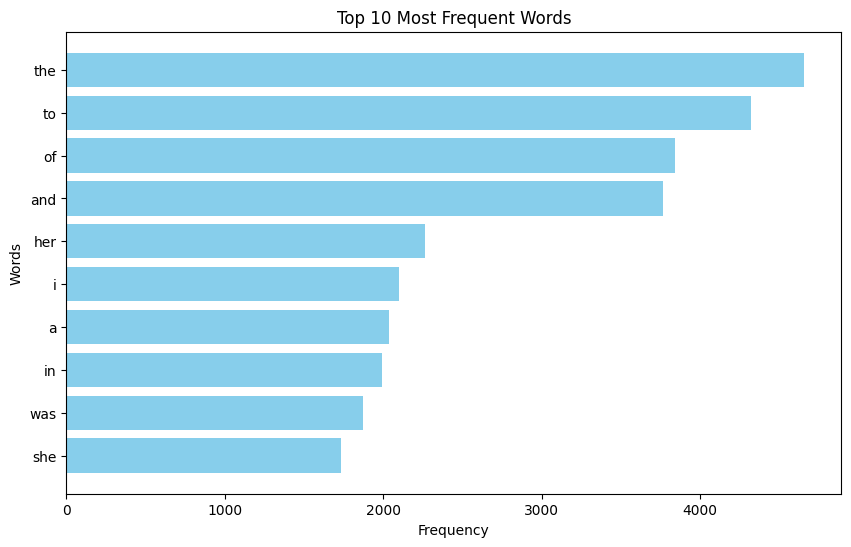

In [18]:
if __name__ == "__main__":
    url = "https://www.gutenberg.org/files/1342/1342-0.txt"
    print("Завантаження тексту...")
    text = fetch_text_from_url(url)

    print("Виконання MapReduce...")
    word_freqs = parallel_map_reduce(text)

    print("Візуалізація результатів...")
    visualize_top_words(word_freqs, top_n=10)
